<a href="https://colab.research.google.com/github/yunusemravci/ML-Assignments/blob/master/A2_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Setup K-fold Cross Validation with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#load the excel file
data = pd.read_excel('/content/drive/MyDrive/HW3-ML/Concrete_Quality_Binary.xlsx')

X = data.drop(columns=['Index', 'Concrete Quality'])
y = data['Concrete Quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Models and Hyperparameter Grids

In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "Naive Bayes": GaussianNB()
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "KNN": {'n_neighbors': list(range(1, 31)),
            'weights': ['uniform', 'distance'],
            'p': [1, 2]},
    "Decision Tree": {'criterion': ['gini', 'entropy'],
                      'max_depth': [None, 3, 5, 7, 10, 20, 30, 40, 50],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {"n_estimators": [50, 100], "max_depth": [3, 5, 7]},
    "Linear SVM": {'C': [0.1, 1.0, 10, 100],
                   'penalty': ['l1', 'l2'],
                   'dual': [False]  # This ensures the l1 penalty works without errors
                   },
    "Naive Bayes": {}  # No hyperparameters to tune for GaussianNB
}

# Train and Validate Models
For each model, perform cross-validation and store average accuracies. Later, select the best model based on average accuracy.

In [ ]:
best_score = 0
best_model_name = ""

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=kf)
    grid_search.fit(X_scaled, y)
    score = grid_search.best_score_

    if score > best_score:
        best_score = score
        best_model_name = model_name

    print(f"{model_name}: Average Accuracy = {score:.4f}, Best Params = {grid_search.best_params_}")

print(f"\nThe best model is {best_model_name} with an average accuracy of {best_score:.4f}")

Logistic Regression: Average Accuracy = 0.9374, Best Params = {'C': 10}
KNN: Average Accuracy = 0.9546, Best Params = {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Decision Tree: Average Accuracy = 0.9718, Best Params = {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest: Average Accuracy = 0.9828, Best Params = {'max_depth': 7, 'n_estimators': 50}
Linear SVM: Average Accuracy = 0.9328, Best Params = {'C': 1.0, 'dual': False, 'penalty': 'l1'}
Naive Bayes: Average Accuracy = 0.8624, Best Params = {}

The best model is Random Forest with an average accuracy of 0.9828


# Confusion Matrix and Its Accuracy for the Best Model:

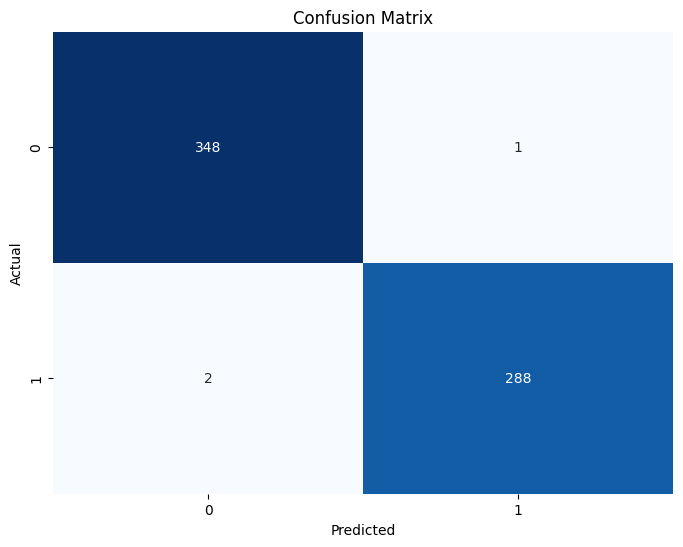


The best model is Random Forest with an accuracy of 0.9953


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict using the entire dataset with best model which is Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), param_grids["Random Forest"], cv=kf)
grid_search.fit(X_scaled,y)
y_pred = grid_search.predict(X_scaled)

# Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
acc = accuracy_score(y, y_pred)

print(f"\nThe best model is {best_model_name} with an accuracy of {acc:.4f}")
